# 📉📊📈**Stock Price Prediction Using Different Machine Learning Models and Compare the Performance of the Models**📉📊📈




The stock price forecast is one of the most preferred topics and most interesting topics in the science industry. However, stock market price forecasts are challenging compared to other price forecasting case studies. Many scholars and industry experts have come to a greater consensus a decade. They have studied stocks in various fields such as Computer Science, Economics, Business Arithmetic, and Marketing price forecasts. The stock has been identified according to them as a random walking behavior at market prices. The sudden rises and falls have been the main reason behind stock market price forecasting being a big challenge. An efficient and accurate. stock market forecasting model will help managers, investors, and decision-makers make the right decisions regarding their investments. Machine learning techniques used to predict stock prices include the analysis of historical data to predict the likelihood of a future event or to predict future performance. This is done by looking at patterns of data that include current and past information and finding the most suitable predictive models.

# ✅ **Linear Regression** ✅

Linear regression attempts to model the relationship between two variables by fitting a linear equation to observed data. One variable is considered to be an explanatory variable, and the other is considered to be a dependent variable. For example, a modeler might want to relate the weights of individuals to their heights using a linear regression model.

# **Import Libraries**

In [1]:
# yahoo_finance is used to fetch data 
!pip install yfinance

In [2]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# yahoo_finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

# **Load Dataset into the Data Frame**

In [3]:
# input
symbol = 'AMD'
start = '2007-01-01'
end = '2018-12-31'

# read data 
dataset = yf.download(symbol,start,end)

# view columns
dataset.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-01-03,20.080000,20.400000,19.350000,19.520000,19.520000,28350300
2007-01-04,19.660000,19.860001,19.320000,19.790001,19.790001,23652500
2007-01-05,19.540001,19.910000,19.540001,19.709999,19.709999,15902400
2007-01-08,19.709999,19.860001,19.370001,19.469999,19.469999,15814800
2007-01-09,19.450001,19.709999,19.370001,19.650000,19.650000,14494200


# **Dataset Preprocessing**

In [4]:
dataset['Open_Close'] = (dataset['Open'] - dataset['Adj Close'])/dataset['Open']
dataset['High_Low'] = (dataset['High'] - dataset['Low'])/dataset['Low']
dataset['Increase_Decrease'] = np.where(dataset['Volume'].shift(-1) > dataset['Volume'],1,0)
dataset['Buy_Sell_on_Open'] = np.where(dataset['Open'].shift(-1) > dataset['Open'],1,0)
dataset['Buy_Sell'] = np.where(dataset['Adj Close'].shift(-1) > dataset['Adj Close'],1,0)
dataset['Returns'] = dataset['Adj Close'].pct_change()
dataset = dataset.dropna()
dataset.head()

,Open,High,Low,Close,Adj Close,Volume,Open_Close,High_Low,Increase_Decrease,Buy_Sell_on_Open,Buy_Sell,Returns
Date,,,,,,,,,,,,
2007-01-04,19.660000,19.860001,19.320000,19.790001,19.790001,23652500,-0.006612,0.027950,0,0,0,0.013832
2007-01-05,19.540001,19.910000,19.540001,19.709999,19.709999,15902400,-0.008700,0.018935,0,1,0,-0.004043
2007-01-08,19.709999,19.860001,19.370001,19.469999,19.469999,15814800,0.012177,0.025297,0,0,1,-0.012177
2007-01-09,19.450001,19.709999,19.370001,19.650000,19.650000,14494200,-0.010283,0.017553,1,1,1,0.009245
2007-01-10,19.639999,20.020000,19.500000,20.010000,20.010000,19783200,-0.018839,0.026667,1,1,1,0.018321


# **View Dataset**

In [5]:
# view dataset
dataset

,Open,High,Low,Close,Adj Close,Volume,Open_Close,High_Low,Increase_Decrease,Buy_Sell_on_Open,Buy_Sell,Returns
Date,,,,,,,,,,,,
2007-01-04,19.660000,19.860001,19.320000,19.790001,19.790001,23652500,-0.006612,0.027950,0,0,0,0.013832
2007-01-05,19.540001,19.910000,19.540001,19.709999,19.709999,15902400,-0.008700,0.018935,0,1,0,-0.004043
2007-01-08,19.709999,19.860001,19.370001,19.469999,19.469999,15814800,0.012177,0.025297,0,0,1,-0.012177
2007-01-09,19.450001,19.709999,19.370001,19.650000,19.650000,14494200,-0.010283,0.017553,1,1,1,0.009245
2007-01-10,19.639999,20.020000,19.500000,20.010000,20.010000,19783200,-0.018839,0.026667,1,1,1,0.018321
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-21,18.120001,18.340000,16.760000,16.930000,16.930000,132246000,0.065673,0.094272,0,0,0,-0.056299
2018-12-24,16.520000,17.219999,16.370001,16.650000,16.650000,62933100,-0.007869,0.051924,1,1,1,-0.016539
2018-12-26,16.879999,17.910000,16.030001,17.900000,17.900000,108811800,-0.060427,0.117280,1,1,0,0.075075


# **Dataset Cleaning and Null Value Testing**

In [6]:
# view how many null values in each column
dataset.isnull().sum()

Open                 0
High                 0
Low                  0
Close                0
Adj Close            0
Volume               0
Open_Close           0
High_Low             0
Increase_Decrease    0
Buy_Sell_on_Open     0
Buy_Sell             0
Returns              0
dtype: int64

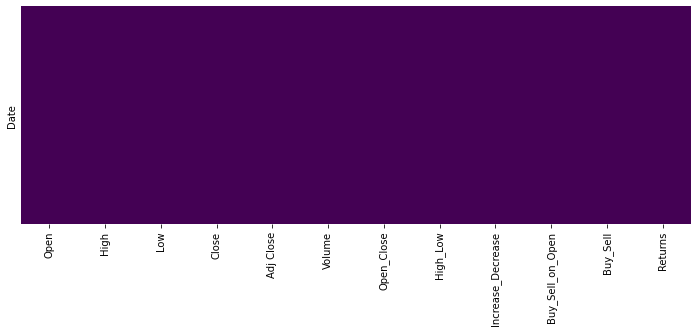

In [7]:
plt.figure(figsize=(12,4))
sns.heatmap(dataset.isnull(), yticklabels=False,cbar=False,cmap='viridis')
plt.savefig("Figure 1: Heatmap for Null Values")

# **Analyze the Dataset**

In [8]:
# view number of rows, number of columns
dataset.shape

(3018, 12)

In [9]:
# total number of records
dataset.size
print("Total number of records = ",dataset.size)

Total number of records =  36216


In [10]:
# view columns names
dataset.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Open_Close',
       'High_Low', 'Increase_Decrease', 'Buy_Sell_on_Open', 'Buy_Sell',
       'Returns'],
      dtype='object')

In [11]:
# view data types of the columns
dataset.dtypes

Open                 float64
High                 float64
Low                  float64
Close                float64
Adj Close            float64
Volume                 int64
Open_Close           float64
High_Low             float64
Increase_Decrease      int32
Buy_Sell_on_Open       int32
Buy_Sell               int32
Returns              float64
dtype: object

In [12]:
# view dataset info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3018 entries, 2007-01-04 to 2018-12-28
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Open               3018 non-null   float64
 1   High               3018 non-null   float64
 2   Low                3018 non-null   float64
 3   Close              3018 non-null   float64
 4   Adj Close          3018 non-null   float64
 5   Volume             3018 non-null   int64  
 6   Open_Close         3018 non-null   float64
 7   High_Low           3018 non-null   float64
 8   Increase_Decrease  3018 non-null   int32  
 9   Buy_Sell_on_Open   3018 non-null   int32  
 10  Buy_Sell           3018 non-null   int32  
 11  Returns            3018 non-null   float64
dtypes: float64(8), int32(3), int64(1)
memory usage: 271.1 KB


In [13]:
# view the statistics per each column
dataset.describe()

,Open,High,Low,Close,Adj Close,Volume,Open_Close,High_Low,Increase_Decrease,Buy_Sell_on_Open,Buy_Sell,Returns
count,3018.000000,3018.000000,3018.000000,3018.000000,3018.000000,3.018000e+03,3018.000000,3018.000000,3018.000000,3018.000000,3018.000000,3018.000000
mean,7.310083,7.464099,7.140699,7.300109,7.300109,3.208842e+07,0.000972,0.047326,0.479125,0.478131,0.482107,0.000695
std,5.036123,5.150326,4.905780,5.030512,5.030512,3.008090e+07,0.031819,0.034146,0.499647,0.499604,0.499763,0.038372
min,1.620000,1.690000,1.610000,1.620000,1.620000,0.000000e+00,-0.250784,0.000000,0.000000,0.000000,0.000000,-0.242291
25%,3.620000,3.690000,3.540000,3.612500,3.612500,1.482710e+07,-0.015044,0.027894,0.000000,0.000000,0.000000,-0.017641
50%,6.115000,6.250000,5.970000,6.120000,6.120000,2.267490e+07,0.001884,0.038835,0.000000,0.000000,0.000000,0.000000
75%,9.750000,9.900000,9.545000,9.717500,9.717500,3.698055e+07,0.018259,0.057099,1.000000,1.000000,1.000000,0.018662
max,33.180000,34.139999,32.189999,32.720001,32.720001,3.250584e+08,0.155379,1.000000,1.000000,1.000000,1.000000,0.522901


array([[<AxesSubplot:title={'center':'Open'}>,
        <AxesSubplot:title={'center':'High'}>,
        <AxesSubplot:title={'center':'Low'}>],
       [<AxesSubplot:title={'center':'Close'}>,
        <AxesSubplot:title={'center':'Adj Close'}>,
        <AxesSubplot:title={'center':'Volume'}>],
       [<AxesSubplot:title={'center':'Open_Close'}>,
        <AxesSubplot:title={'center':'High_Low'}>,
        <AxesSubplot:title={'center':'Increase_Decrease'}>],
       [<AxesSubplot:title={'center':'Buy_Sell_on_Open'}>,
        <AxesSubplot:title={'center':'Buy_Sell'}>,
        <AxesSubplot:title={'center':'Returns'}>]], dtype=object)

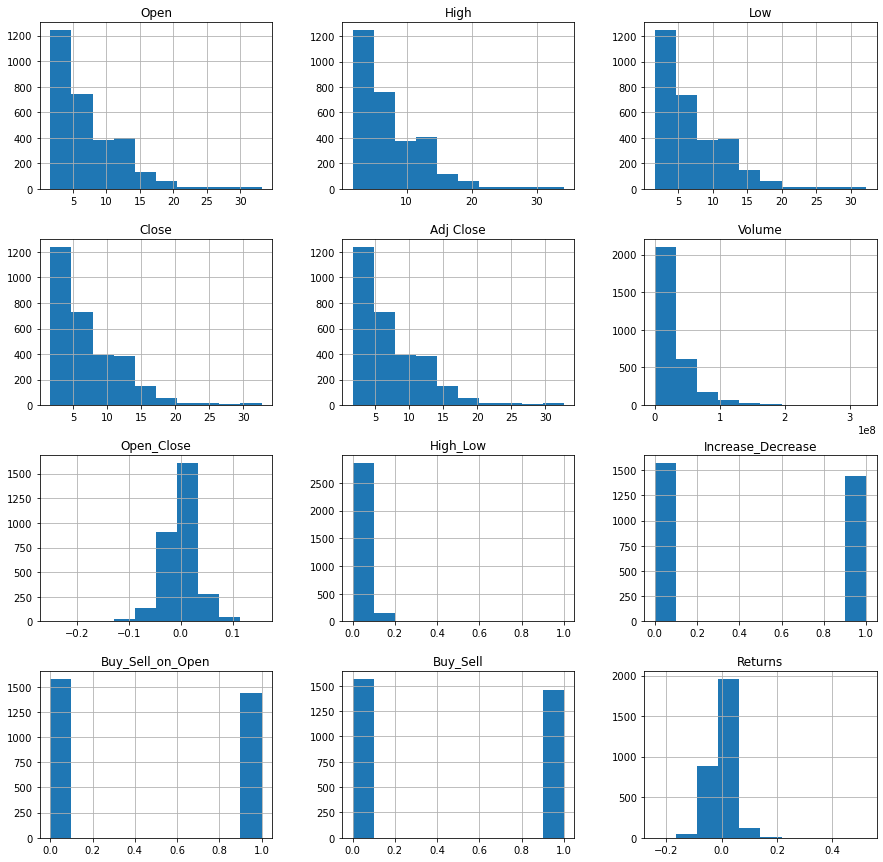

In [14]:
# view the histogram per each numerical column
dataset.hist(figsize=(15, 15))

<AxesSubplot:xlabel='Adj Close', ylabel='Density'>

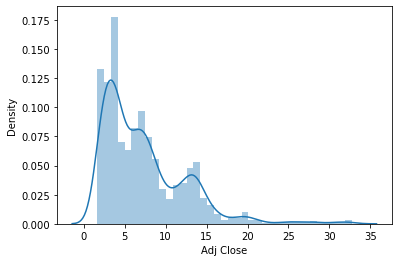

In [15]:
sns.distplot(dataset['Adj Close'])

<AxesSubplot:>

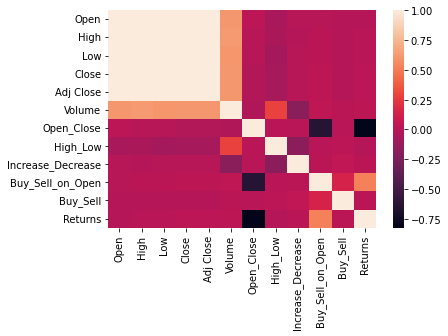

In [16]:
sns.heatmap(dataset.corr())

# **Define X and Y**

In [17]:
X = dataset[['Open', 'High', 'Low','Volume', 'Open_Close', 'High_Low', 'Returns']]
y = dataset['Adj Close']